# CS2103 / Lab-02 - Assignment 03 - `04-08-2025`

**Topic**: Gradient Descent

**Instructions**: Complete all the tasks from one of *section A or B* below. Submit your code as a notebook file named `A03.ipynb`

---


## Section A: Python Programming

Use pytorch to create two perceptron as shown in the figure below:

[1] ![F1](http://172.30.1.73:2103/store/A03_data/F1.png)

[2] ![F2](http://172.30.1.73:2103/store/A03_data/F2.png)


[a] Assign proper weights to the neural network to show logical functions like AND, OR and XOR.

[b] Use Autograd to perform gradient descent on the Neural Netowrk Models created above. hint: generate your own dataset by assuming some ground truth about the weights.

```



## Section B: Gradient Descent

* **Linear Regression**: You are provided with two datasets: [car_train.csv](http://172.30.1.73:2103/store/A03_data/car_train.csv) and [car_test.csv](http://172.30.1.73:2103/store/A03_data/car_test.csv) Your task is to predict car prices (price) based on the given features using linear regression. Report the loss observed by the trained model on the test set. Also, plot the ground truth and predictions for the test set. 

* **Logistic Regression**: You are provided with the [Breat Cancer Dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data) containing 30 features for each data point. Convert the diagnosis column to binary labels (1 for Malignant, 0 for Benign). Split the data into training and testing sets. Perform Logistic Regression Classification to train a simple neural network model. Report the Accuracy, Precision and Recall on the test set.


In [ ]:
# write your code here

# Section B Solution

## Linear Regression

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

df_train = pd.read_csv('./car_train.csv')
df_test = pd.read_csv('./car_test.csv')

---

### Sepearating the features and target

In [32]:
X_train = df_train.drop(labels=['price'], axis=1)
y_train = df_train.price

X_test = df_test.drop(labels=['price'], axis=1)
y_test = df_test.price

### Importing Linear Model and pipeline to scale the data to guassian

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [34]:
# pipeline to scale the train and test data both easily
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

In [35]:
# Cross-validation on training set ( 5 folds)
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(
    pipeline, X_train, y_train,
    cv=5,
    scoring='neg_mean_squared_error'
)

print("Cross-validation MSE (per fold):", -cv_scores)
print("Mean CV MSE:", -cv_scores.mean())


Cross-validation MSE (per fold): [21652928.54969549 21083920.48832829  7049552.34107876 15576268.15273798
 47174446.47938827]
Mean CV MSE: 22507423.202245753


In [36]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [37]:
y_pred = pipeline.predict(X_test)
y_pred

array([15078.47547366, 12536.92938739, 21063.75102356, 21063.75102356,
       21063.75102356, 12734.800938  , 12734.800938  , 15276.34702427,
       15276.34702427,  7795.98418025,  6894.43256336,  7795.98418025,
        7795.98418025,  8345.21007643,  7795.98418025,  7684.28704802,
        7795.98418025,  8345.21007643,  7242.2694379 , 13829.24442899])

### Visualization

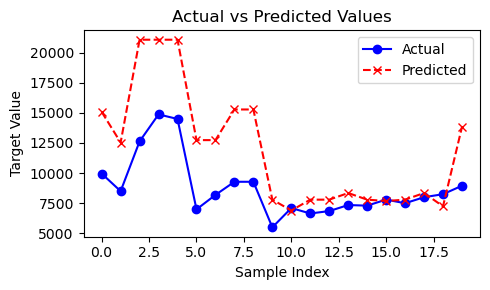

In [51]:
import numpy as np

indices = np.arange(len(y_test))
plt.figure(figsize=(5,3))

plt.plot(indices, y_test, color='blue', marker='o', label='Actual', linestyle='-')

plt.plot(indices, y_pred, color='red', marker='x', label='Predicted', linestyle='--')



plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.tight_layout()
plt.show()

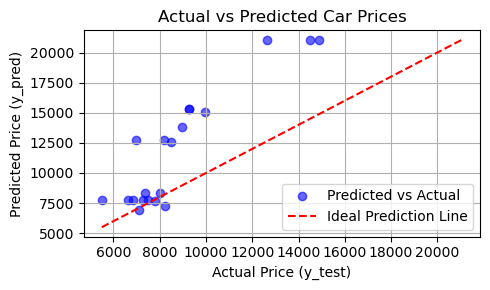

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))

# Scatter: predicted vs actual prices
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted vs Actual')

# Ideal line (y = x)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Ideal Prediction Line')

plt.xlabel('Actual Price (y_test)')
plt.ylabel('Predicted Price (y_pred)')
plt.title('Actual vs Predicted Car Prices')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Error

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, classification_report

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [41]:
print(f"Mean Squared Error: {mse}, Mean Absolute Error: {mae}")

Mean Squared Error: 17734868.604855448, Mean Absolute Error: 3269.0775145063158


## Logistic Classifier

### Using SkLearn BrestCancer dataset it also has the same shape as on the link and has column names too

*I can use the Link one too, but for now this is more convinient*

In [42]:
from sklearn.datasets import load_breast_cancer

df = load_breast_cancer(as_frame=True)
# df.target




In [43]:


# df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data')
# df.head(30)


In [44]:
# Encoding the M -> 1, and B -> 0
df.target.replace({0: 1, 1: 0}, inplace=True)

In [45]:


X_clf = pd.DataFrame(df.data)
y_clf = pd.DataFrame(df.target)


In [46]:
# Train test split

from sklearn.model_selection import train_test_split

X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(X_clf, y_clf,random_state=42, test_size=0.33)


In [47]:
from sklearn.linear_model import LogisticRegression

model2 = LogisticRegression(random_state=42, max_iter=2700)

model2.fit(X_clf_train, np.array(y_clf_train).ravel())

LogisticRegression(max_iter=2700, random_state=42)

In [48]:
y_clf_pred = model2.predict(X_clf_test)

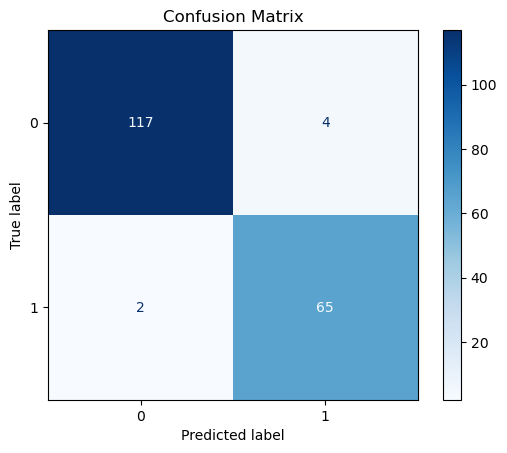

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_clf_test, y_clf_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

*Classification Report*

In [50]:
print(classification_report(y_clf_test, y_clf_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       121
           1       0.94      0.97      0.96        67

    accuracy                           0.97       188
   macro avg       0.96      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188

